Student Details

Name: Fergus Mc Hale

ID: 18203485

All necessary imports are provided. Please do not add further imports.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

Below is the exact same data you used for the regression in E-tivity 3, but this time you know exactly what function generated the data

In [2]:
def target(X):
    #return: 0.5X^5-0.5X^3-4.25X^2+5.125X-0.4375
    return 0.5*((X-.5)-10*(X-.5)**2-(X-.5)**3+X**5)+1

points = 100
X = np.linspace(0, 1, points) # 100 values between 0 and 100
noise= np.random.random(points)/4
y_nf = target(X) #noise free target
y = y_nf+noise #noisy target

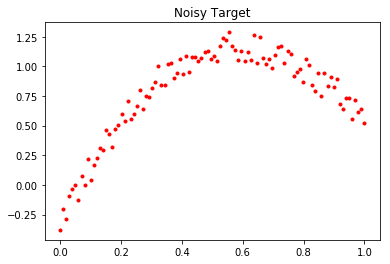

In [3]:
plt.title('Noisy Target')
plt.plot(X,y,'r.')
plt.show()

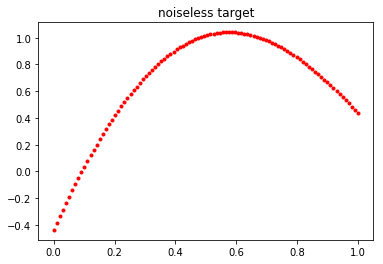

In [4]:
plt.title('noiseless target')
plt.plot(X,y_nf,'r.')
plt.show()

Below is an implementation of linear regression with regularization

In [5]:
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [6]:
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [7]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

To create higher order features:

In [8]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

Iterate over lambda, train the model and calculate Eout. Plot the latter versus lambda to see how much regularization is required.

In [9]:
ein=[]
eout=[]
weights=[]

lambdas = np.logspace(-10, 0, num=1000) #Lamba is infinite
X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)

In [10]:
LAMBDAS_ALPHAS = np.logspace(-10, 0, num=1000)
K_FOLDS = 10

# Task 4.1 

Using the above code, find the optimum regularization parameter, l. In order to do so, you will need to decide on a suitable list of l values. Pick at most 1000 values! Once you have found the optimal l, compare the Eout obtained with this l with the Eout obtained without regularization. You should see an impressive improvement!

In [11]:
min_eout_idx = np.argmin(eout)
min_eout_lambda = lambdas[min_eout_idx]
print('Best value of lambda       :',  min_eout_lambda)
print('Best lambda found at index :',  min_eout_idx)    

Best value of lambda       : 0.0009056428379445294
Best lambda found at index : 695


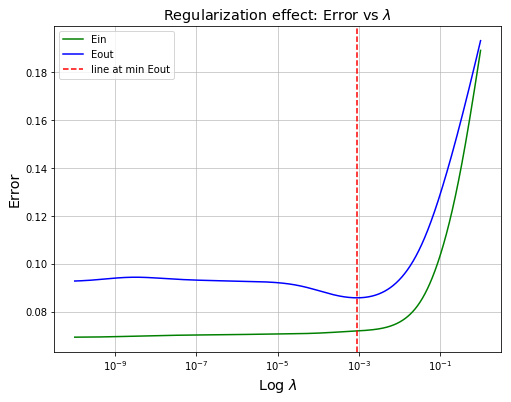

In [12]:
plt.figure(figsize=(8,6))
plt.plot(lambdas, ein, 'g-', label='Ein')
plt.plot(lambdas, eout, 'b-', label='Eout')
plt.axvline(x=min_eout_lambda, label='line at min Eout', c='r', ls='--', lw=1.5)
plt.title('Regularization effect: Error vs $\lambda$', fontsize='x-large')
plt.xlabel('Log $\lambda$', fontsize='x-large')
plt.ylabel('Error', fontsize='x-large')
plt.xscale('log')  
plt.grid(alpha=0.75)
plt.legend()
plt.show()

# Task 4.2 Provide the following plots:

  * A plot showing the estimate of Eout vs l on the domain [0,1]
  * A plot with three sub-plots containing an overfitted model, a model with the optimal l, and an underfitted model. 
  
In each plot, you should plot the target function in addition to the final hypothesis. Choose values for l that clearly demonstrate over- and underfitting.

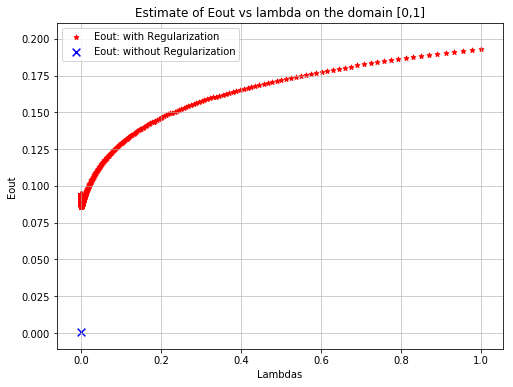

In [13]:
plt.figure(figsize=(8,6))

# Plot for all 1000 values of lambdas[0,1]
plt.scatter(lambdas, eout, color='r', marker='*', s=25, label='Eout: with Regularization')

plt.scatter(0, min_eout_lambda, color='b', marker='x', s=60, label='Eout: without Regularization')

plt.title('Estimate of Eout vs lambda on the domain [0,1]')
plt.xlabel('Lambdas')
plt.ylabel('Eout')

plt.legend(loc='best')
plt.grid(alpha=0.75)
plt.show()

In [14]:
 def calc_prediction(weights, X): 
    # From previous notebook
    h = weights[0]
    for i in np.arange(1, len(weights)):
        h += weights[i]*X ** i    
    return h 

In [15]:
def regularisation(X,y,l):
    ein=[]
    eout=[]
    pred=[]

    X_trans = transPoly(X,50)
    # random_state fixed to get reproducible (and 'good'! :-)) results
    X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)
   
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    pred=calc_prediction(w,X)
    
    plt.plot(X, y, 'r.')
    plt.plot(X, pred , 'b-')
    plt.show()

In [16]:
min_ein = np.amin(ein)
lambda_min_ein = lambdas[np.argmin(ein)]

min_eout = np.amin(eout)
lambda_min_eout = lambdas[np.argmin(eout)]

In [17]:
print(f"The unregularised value of Eout is {eout[0]:.6f}")
print(f"The best regularised value of Eout is {min_eout:.6f} and used lambda = {lambda_min_eout:.6f}")

The unregularised value of Eout is 0.092958
The best regularised value of Eout is 0.085950 and used lambda = 0.000906


# Overfit

The lambda param is set to 0 causing the line to overfit.

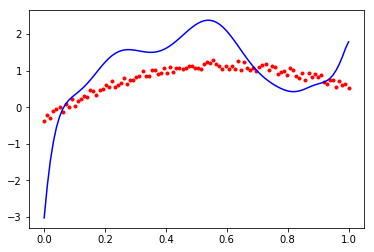

In [18]:
regularisation(X,y,0)

# Correct fit

The lambda param has been set to the best value causing the line to fit correctly to the data

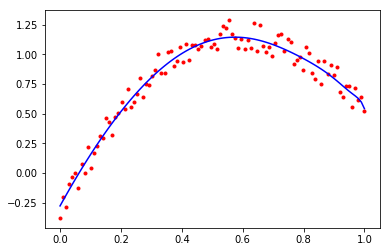

In [19]:
regularisation(X,y,lambda_min_eout)

# Underfit

The lambda/alpha param has been set to value of 1.

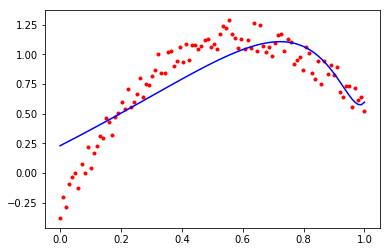

In [20]:
regularisation(X,y,1)

# Task 5 (CE6002)
  * Use the code from Task 4 and perform the same analysis using 10-fold cross-validation. 
  * Use Scikitlearn’s KFOLD for this and think carefully about the parameters you use in KFOLD.
  * Note that the data set provided is ordered by increasing X.

In [21]:
def dataset_cross_val(X,y,lambdas,num_folds=10):
    overall_eout=[]
    X_trans = transPoly(X,50)
    
    for usr_lambda in lambdas:
        
        ein=[]
        eout=[]
        average_eout=[]
        
        # Split data into training and test data sets
        kf = KFold(n_splits=num_folds, shuffle=True,random_state = 5)

        # random_state fixed to get reproducible (and 'good'! :-)) results
        fold = 1
        for train_index, test_index in kf.split(X_trans):
            # Training data
            X_train_CV = X_trans[train_index]
            y_train_CV = y[train_index]
    
            # Testing data
            X_test_CV = X_trans[test_index]
            y_test_CV = y[test_index]
   
            w = weights_reg(X_train_CV,y_train_CV,usr_lambda)
            ein.append(calc_error(w,X_train_CV,y_train_CV))
            local_eout = calc_error(w,X_test_CV,y_test_CV)
            eout.append(local_eout)
            print("K-Fold:", fold, ", Eout: ", local_eout)
            fold += 1
        
        avg_eout = np.mean(eout)
        print("Average Eout: ",avg_eout)
        overall_eout.append(avg_eout)
    
    min_eout_index = np.argmin(overall_eout)
    optimal_lambda_CV = lambdas[min_eout_index]
    return optimal_lambda_CV, overall_eout[min_eout_index]

In [22]:
optimal_lambda_CV ,min_eout =  dataset_cross_val(X,y,LAMBDAS_ALPHAS) 
print ("\n K Cross Validation lambda: {}".format(optimal_lambda_CV))

K-Fold: 1 , Eout:  0.09295504629888389
K-Fold: 2 , Eout:  0.07984596527050057
K-Fold: 3 , Eout:  0.10330856592549253
K-Fold: 4 , Eout:  0.0763058572370685
K-Fold: 5 , Eout:  0.08002479353301975
K-Fold: 6 , Eout:  0.06744373710983743
K-Fold: 7 , Eout:  0.09927554051496489
K-Fold: 8 , Eout:  0.08584456209862192
K-Fold: 9 , Eout:  0.09764456079012836
K-Fold: 10 , Eout:  0.24404012970432962
Average Eout:  0.10266887584828474
K-Fold: 1 , Eout:  0.09296353391886754
K-Fold: 2 , Eout:  0.07984593037470204
K-Fold: 3 , Eout:  0.10329595253616185
K-Fold: 4 , Eout:  0.0763137275567058
K-Fold: 5 , Eout:  0.08002434054435627
K-Fold: 6 , Eout:  0.06741790478777186
K-Fold: 7 , Eout:  0.09926361653185897
K-Fold: 8 , Eout:  0.08585318272770473
K-Fold: 9 , Eout:  0.09763141693655202
K-Fold: 10 , Eout:  0.2426514206649579
Average Eout:  0.10252610265796389
K-Fold: 1 , Eout:  0.09296775793275357
K-Fold: 2 , Eout:  0.07984323554905796
K-Fold: 3 , Eout:  0.1032853355555652
K-Fold: 4 , Eout:  0.07632266538881

K-Fold: 5 , Eout:  0.08012389641781568
K-Fold: 6 , Eout:  0.0665045976097987
K-Fold: 7 , Eout:  0.09957132203314044
K-Fold: 8 , Eout:  0.08623017521207367
K-Fold: 9 , Eout:  0.09702779385961333
K-Fold: 10 , Eout:  0.18844277440841592
Average Eout:  0.09705666120840178
K-Fold: 1 , Eout:  0.09325775306096251
K-Fold: 2 , Eout:  0.07991211397101419
K-Fold: 3 , Eout:  0.10281575858190371
K-Fold: 4 , Eout:  0.07669784046051754
K-Fold: 5 , Eout:  0.0801298068547651
K-Fold: 6 , Eout:  0.06647481684522207
K-Fold: 7 , Eout:  0.09958024485807883
K-Fold: 8 , Eout:  0.08624747113987882
K-Fold: 9 , Eout:  0.09700746401592757
K-Fold: 10 , Eout:  0.18667693352634313
Average Eout:  0.09688002033146134
K-Fold: 1 , Eout:  0.09326863314384409
K-Fold: 2 , Eout:  0.0799193819400779
K-Fold: 3 , Eout:  0.10279723273042356
K-Fold: 4 , Eout:  0.07671152121876033
K-Fold: 5 , Eout:  0.08013685024722567
K-Fold: 6 , Eout:  0.06644650137312791
K-Fold: 7 , Eout:  0.09959265478231416
K-Fold: 8 , Eout:  0.0862620311446

K-Fold: 5 , Eout:  0.08038898620912939
K-Fold: 6 , Eout:  0.06569999470155391
K-Fold: 7 , Eout:  0.1000207194675222
K-Fold: 8 , Eout:  0.0867947454435218
K-Fold: 9 , Eout:  0.096332950310423
K-Fold: 10 , Eout:  0.132675596686199
Average Eout:  0.09152313739395976
K-Fold: 1 , Eout:  0.09368162989606732
K-Fold: 2 , Eout:  0.08022970334977406
K-Fold: 3 , Eout:  0.10222420609373029
K-Fold: 4 , Eout:  0.07720896215325176
K-Fold: 5 , Eout:  0.08039937883145708
K-Fold: 6 , Eout:  0.06567955687712443
K-Fold: 7 , Eout:  0.10003735924005233
K-Fold: 8 , Eout:  0.08681696201911078
K-Fold: 9 , Eout:  0.09631029884662184
K-Fold: 10 , Eout:  0.13093493866950875
Average Eout:  0.09135229959766987
K-Fold: 1 , Eout:  0.09369758210725981
K-Fold: 2 , Eout:  0.08024280730777948
K-Fold: 3 , Eout:  0.10220337879934
K-Fold: 4 , Eout:  0.07722696416447072
K-Fold: 5 , Eout:  0.08041022808397508
K-Fold: 6 , Eout:  0.06565905780231951
K-Fold: 7 , Eout:  0.1000496138416873
K-Fold: 8 , Eout:  0.08683890762956464
K-

K-Fold: 10 , Eout:  0.08689140207083308
Average Eout:  0.08705242844215853
K-Fold: 1 , Eout:  0.09415067908276094
K-Fold: 2 , Eout:  0.08070054698840748
K-Fold: 3 , Eout:  0.1015925216049696
K-Fold: 4 , Eout:  0.07781223493699618
K-Fold: 5 , Eout:  0.08076121946571373
K-Fold: 6 , Eout:  0.06529053439291391
K-Fold: 7 , Eout:  0.10019050286989746
K-Fold: 8 , Eout:  0.08752371381049856
K-Fold: 9 , Eout:  0.0956455812554003
K-Fold: 10 , Eout:  0.08581148646013373
Average Eout:  0.0869479020867692
K-Fold: 1 , Eout:  0.09416468683089545
K-Fold: 2 , Eout:  0.08071631494201345
K-Fold: 3 , Eout:  0.10157291175361119
K-Fold: 4 , Eout:  0.07783168723322083
K-Fold: 5 , Eout:  0.08077270043487816
K-Fold: 6 , Eout:  0.0652861798957493
K-Fold: 7 , Eout:  0.10018214332480077
K-Fold: 8 , Eout:  0.08754642349617285
K-Fold: 9 , Eout:  0.0956267231407123
K-Fold: 10 , Eout:  0.08476280301232378
Average Eout:  0.0868462574064378
K-Fold: 1 , Eout:  0.09417791309812831
K-Fold: 2 , Eout:  0.08073206275538888
K

K-Fold: 8 , Eout:  0.08822553470093043
K-Fold: 9 , Eout:  0.09513022084523408
K-Fold: 10 , Eout:  0.0684004304546354
Average Eout:  0.08525061085306848
K-Fold: 1 , Eout:  0.09449846544043052
K-Fold: 2 , Eout:  0.08119539173283051
K-Fold: 3 , Eout:  0.10096745908403792
K-Fold: 4 , Eout:  0.07841723234495677
K-Fold: 5 , Eout:  0.0811320537530332
K-Fold: 6 , Eout:  0.06535834184805168
K-Fold: 7 , Eout:  0.09915813273739091
K-Fold: 8 , Eout:  0.08824222976931345
K-Fold: 9 , Eout:  0.0951189585316256
K-Fold: 10 , Eout:  0.06839287438046554
Average Eout:  0.08524811396221361
K-Fold: 1 , Eout:  0.09450356555114148
K-Fold: 2 , Eout:  0.08120671668333854
K-Fold: 3 , Eout:  0.10095162355376079
K-Fold: 4 , Eout:  0.07843161298040555
K-Fold: 5 , Eout:  0.08114054494939828
K-Fold: 6 , Eout:  0.06536496767007385
K-Fold: 7 , Eout:  0.09910127999751198
K-Fold: 8 , Eout:  0.0882585509581327
K-Fold: 9 , Eout:  0.09510798065036008
K-Fold: 10 , Eout:  0.06840608657335699
Average Eout:  0.08524729295674803

K-Fold: 2 , Eout:  0.0814693996364353
K-Fold: 3 , Eout:  0.10044313076930951
K-Fold: 4 , Eout:  0.07880391357916226
K-Fold: 5 , Eout:  0.08134257543344477
K-Fold: 6 , Eout:  0.06565096410394292
K-Fold: 7 , Eout:  0.09621910395184789
K-Fold: 8 , Eout:  0.08863247708184127
K-Fold: 9 , Eout:  0.09483112139677234
K-Fold: 10 , Eout:  0.07615883625393156
Average Eout:  0.08580378815446665
K-Fold: 1 , Eout:  0.09448079512332573
K-Fold: 2 , Eout:  0.08147294376127899
K-Fold: 3 , Eout:  0.10042987993788842
K-Fold: 4 , Eout:  0.0788110119814892
K-Fold: 5 , Eout:  0.08134553834362913
K-Fold: 6 , Eout:  0.06565961818683967
K-Fold: 7 , Eout:  0.09611363297148108
K-Fold: 8 , Eout:  0.08863680414357038
K-Fold: 9 , Eout:  0.09482565027508752
K-Fold: 10 , Eout:  0.07645899782972529
Average Eout:  0.08582348725543154
K-Fold: 1 , Eout:  0.09447507542465988
K-Fold: 2 , Eout:  0.08147624389539276
K-Fold: 3 , Eout:  0.10041667450381783
K-Fold: 4 , Eout:  0.0788179606007929
K-Fold: 5 , Eout:  0.0813485101055

K-Fold: 10 , Eout:  0.08528987151073858
Average Eout:  0.0862556679429832
K-Fold: 1 , Eout:  0.09417468919071928
K-Fold: 2 , Eout:  0.08146138570946729
K-Fold: 3 , Eout:  0.10000435347482593
K-Fold: 4 , Eout:  0.07895931938075963
K-Fold: 5 , Eout:  0.08137722698150576
K-Fold: 6 , Eout:  0.06594688099237271
K-Fold: 7 , Eout:  0.09199446413531025
K-Fold: 8 , Eout:  0.08852979420255942
K-Fold: 9 , Eout:  0.0946648454885682
K-Fold: 10 , Eout:  0.08548907575846877
Average Eout:  0.08626020353145572
K-Fold: 1 , Eout:  0.09416392422616075
K-Fold: 2 , Eout:  0.08145743582768522
K-Fold: 3 , Eout:  0.09999337976738147
K-Fold: 4 , Eout:  0.078961157744459
K-Fold: 5 , Eout:  0.08137631226561455
K-Fold: 6 , Eout:  0.06595450743945214
K-Fold: 7 , Eout:  0.09187200843166363
K-Fold: 8 , Eout:  0.08851897797437494
K-Fold: 9 , Eout:  0.09466042923340104
K-Fold: 10 , Eout:  0.08568427462954296
Average Eout:  0.08626424075397357
K-Fold: 1 , Eout:  0.0941531835355041
K-Fold: 2 , Eout:  0.08145313886696309


K-Fold: 9 , Eout:  0.09447561997342643
K-Fold: 10 , Eout:  0.08992388928061103
Average Eout:  0.0861335698047378
K-Fold: 1 , Eout:  0.0937896401942885
K-Fold: 2 , Eout:  0.08119134064728589
K-Fold: 3 , Eout:  0.09965136633116588
K-Fold: 4 , Eout:  0.07897159197156502
K-Fold: 5 , Eout:  0.0813061535481255
K-Fold: 6 , Eout:  0.0662019112909008
K-Fold: 7 , Eout:  0.08782468426553172
K-Fold: 8 , Eout:  0.08783889482674163
K-Fold: 9 , Eout:  0.09446876197968908
K-Fold: 10 , Eout:  0.08998013135412632
Average Eout:  0.08612244764094204
K-Fold: 1 , Eout:  0.09377970188725811
K-Fold: 2 , Eout:  0.0811801312456748
K-Fold: 3 , Eout:  0.09964272545124726
K-Fold: 4 , Eout:  0.07897064338730504
K-Fold: 5 , Eout:  0.08130330447573332
K-Fold: 6 , Eout:  0.06620854647397884
K-Fold: 7 , Eout:  0.08771919856617988
K-Fold: 8 , Eout:  0.08781062416451828
K-Fold: 9 , Eout:  0.09446180558559013
K-Fold: 10 , Eout:  0.09003268218249062
Average Eout:  0.08611093634199762
K-Fold: 1 , Eout:  0.09376984794612821


K-Fold: 2 , Eout:  0.0807186399372582
K-Fold: 3 , Eout:  0.09938563961407623
K-Fold: 4 , Eout:  0.07891886714933477
K-Fold: 5 , Eout:  0.08120186196500795
K-Fold: 6 , Eout:  0.06642095712854168
K-Fold: 7 , Eout:  0.08471690765885524
K-Fold: 8 , Eout:  0.08666446553548812
K-Fold: 9 , Eout:  0.09418754459612046
K-Fold: 10 , Eout:  0.08987776201304824
Average Eout:  0.08555941531106342
K-Fold: 1 , Eout:  0.09349406909882169
K-Fold: 2 , Eout:  0.08070116187315185
K-Fold: 3 , Eout:  0.09937785297067715
K-Fold: 4 , Eout:  0.0789167269276915
K-Fold: 5 , Eout:  0.08119863914254107
K-Fold: 6 , Eout:  0.06642785452958361
K-Fold: 7 , Eout:  0.08463480525941482
K-Fold: 8 , Eout:  0.0866220901523584
K-Fold: 9 , Eout:  0.09417749167096769
K-Fold: 10 , Eout:  0.08981942191085876
Average Eout:  0.08553701135360665
K-Fold: 1 , Eout:  0.09348671761258491
K-Fold: 2 , Eout:  0.08068352759983707
K-Fold: 3 , Eout:  0.09937005291729682
K-Fold: 4 , Eout:  0.07891455778241258
K-Fold: 5 , Eout:  0.0811954326518

K-Fold: 9 , Eout:  0.09398605674662583
K-Fold: 10 , Eout:  0.08827110463760662
Average Eout:  0.08508957959589387
K-Fold: 1 , Eout:  0.09336585680145595
K-Fold: 2 , Eout:  0.08034009489356254
K-Fold: 3 , Eout:  0.09922508583258269
K-Fold: 4 , Eout:  0.07887297399708972
K-Fold: 5 , Eout:  0.08114256920198974
K-Fold: 6 , Eout:  0.06656716373329455
K-Fold: 7 , Eout:  0.0832097002531614
K-Fold: 8 , Eout:  0.08576789933484638
K-Fold: 9 , Eout:  0.0939749963802627
K-Fold: 10 , Eout:  0.08815852457592303
Average Eout:  0.08506248650041687
K-Fold: 1 , Eout:  0.09335973914736974
K-Fold: 2 , Eout:  0.08031974388103019
K-Fold: 3 , Eout:  0.09921661668732654
K-Fold: 4 , Eout:  0.0788705751674251
K-Fold: 5 , Eout:  0.08114004318883163
K-Fold: 6 , Eout:  0.06657505721726703
K-Fold: 7 , Eout:  0.08314176996468765
K-Fold: 8 , Eout:  0.08572107288210494
K-Fold: 9 , Eout:  0.09396390594986456
K-Fold: 10 , Eout:  0.0880432498313354
Average Eout:  0.08503517739172428
K-Fold: 1 , Eout:  0.09335368087039628

K-Fold: 2 , Eout:  0.07953239407605148
K-Fold: 3 , Eout:  0.09885029825561835
K-Fold: 4 , Eout:  0.07878876798030768
K-Fold: 5 , Eout:  0.0811064447038
K-Fold: 6 , Eout:  0.06692041393639366
K-Fold: 7 , Eout:  0.08117371423953469
K-Fold: 8 , Eout:  0.08403739493847596
K-Fold: 9 , Eout:  0.0935679941822649
K-Fold: 10 , Eout:  0.08227441646008826
Average Eout:  0.08394235024814009
K-Fold: 1 , Eout:  0.0931671535066863
K-Fold: 2 , Eout:  0.07950958600713336
K-Fold: 3 , Eout:  0.09883783937619238
K-Fold: 4 , Eout:  0.07878683139216529
K-Fold: 5 , Eout:  0.0811076151277212
K-Fold: 6 , Eout:  0.06693216120005328
K-Fold: 7 , Eout:  0.08113217141588507
K-Fold: 8 , Eout:  0.08399264747562966
K-Fold: 9 , Eout:  0.09355763892494937
K-Fold: 10 , Eout:  0.08207523501547273
Average Eout:  0.08390988794418887
K-Fold: 1 , Eout:  0.09316267646234623
K-Fold: 2 , Eout:  0.07948675245470403
K-Fold: 3 , Eout:  0.09882522904351
K-Fold: 4 , Eout:  0.07878492614509124
K-Fold: 5 , Eout:  0.08110892777822677
K-

K-Fold: 7 , Eout:  0.08011435121107886
K-Fold: 8 , Eout:  0.08263913139888843
K-Fold: 9 , Eout:  0.09325711399665054
K-Fold: 10 , Eout:  0.07495266426117071
Average Eout:  0.08284552888384097
K-Fold: 1 , Eout:  0.09302824072467154
K-Fold: 2 , Eout:  0.0787235407016789
K-Fold: 3 , Eout:  0.0983173191841395
K-Fold: 4 , Eout:  0.07874282655583015
K-Fold: 5 , Eout:  0.08123561298050523
K-Fold: 6 , Eout:  0.06742203721916283
K-Fold: 7 , Eout:  0.0800928002495464
K-Fold: 8 , Eout:  0.08260209428460273
K-Fold: 9 , Eout:  0.09324945898745146
K-Fold: 10 , Eout:  0.07473576732956012
Average Eout:  0.0828149698217149
K-Fold: 1 , Eout:  0.09302448301783357
K-Fold: 2 , Eout:  0.07870019423700772
K-Fold: 3 , Eout:  0.09829910593958602
K-Fold: 4 , Eout:  0.0787423101003292
K-Fold: 5 , Eout:  0.08124202527772084
K-Fold: 6 , Eout:  0.06743920526751154
K-Fold: 7 , Eout:  0.08007168441829049
K-Fold: 8 , Eout:  0.08256529210283826
K-Fold: 9 , Eout:  0.09324189934438244
K-Fold: 10 , Eout:  0.07451989900161

K-Fold: 5 , Eout:  0.08138973257389318
K-Fold: 6 , Eout:  0.06779201695558018
K-Fold: 7 , Eout:  0.07973873911951852
K-Fold: 8 , Eout:  0.08190922370991754
K-Fold: 9 , Eout:  0.09311703428362902
K-Fold: 10 , Eout:  0.0707535189774204
Average Eout:  0.08225789986655982
K-Fold: 1 , Eout:  0.09295185139599775
K-Fold: 2 , Eout:  0.07823112356800334
K-Fold: 3 , Eout:  0.09790505098536909
K-Fold: 4 , Eout:  0.07874335594211819
K-Fold: 5 , Eout:  0.08139872935547958
K-Fold: 6 , Eout:  0.06781179859167222
K-Fold: 7 , Eout:  0.07972392493306893
K-Fold: 8 , Eout:  0.08187687730143876
K-Fold: 9 , Eout:  0.09311148375207542
K-Fold: 10 , Eout:  0.07058010567234155
Average Eout:  0.08223343014975648
K-Fold: 1 , Eout:  0.09294831909016726
K-Fold: 2 , Eout:  0.07820758296168365
K-Fold: 3 , Eout:  0.0978840851309269
K-Fold: 4 , Eout:  0.07874400508502634
K-Fold: 5 , Eout:  0.08140783242761906
K-Fold: 6 , Eout:  0.0678316781192758
K-Fold: 7 , Eout:  0.07970928745766558
K-Fold: 8 , Eout:  0.0818447356028

K-Fold: 5 , Eout:  0.08174820882656585
K-Fold: 6 , Eout:  0.0685125779669008
K-Fold: 7 , Eout:  0.07923251571879497
K-Fold: 8 , Eout:  0.0808872134717469
K-Fold: 9 , Eout:  0.0929851985729558
K-Fold: 10 , Eout:  0.06698630978191661
Average Eout:  0.0816577710524776
K-Fold: 1 , Eout:  0.09282747140253977
K-Fold: 2 , Eout:  0.07740758055263729
K-Fold: 3 , Eout:  0.09714323105862484
K-Fold: 4 , Eout:  0.07880109961139055
K-Fold: 5 , Eout:  0.08175912266426215
K-Fold: 6 , Eout:  0.06853299671810006
K-Fold: 7 , Eout:  0.07921548833578972
K-Fold: 8 , Eout:  0.08086082763024727
K-Fold: 9 , Eout:  0.09298327032620056
K-Fold: 10 , Eout:  0.066956377861446
Average Eout:  0.08164874661612383
K-Fold: 1 , Eout:  0.09282369059431647
K-Fold: 2 , Eout:  0.0773841731168154
K-Fold: 3 , Eout:  0.0971215286547752
K-Fold: 4 , Eout:  0.07880377363546005
K-Fold: 5 , Eout:  0.08177003620640702
K-Fold: 6 , Eout:  0.06855334711546318
K-Fold: 7 , Eout:  0.07919815783787797
K-Fold: 8 , Eout:  0.08083456223856307


K-Fold: 1 , Eout:  0.09268224480572079
K-Fold: 2 , Eout:  0.0766645839566875
K-Fold: 3 , Eout:  0.09648959056596429
K-Fold: 4 , Eout:  0.07891004247217018
K-Fold: 5 , Eout:  0.08209627841626967
K-Fold: 6 , Eout:  0.06913103274227009
K-Fold: 7 , Eout:  0.07846304220951442
K-Fold: 8 , Eout:  0.08005899989330402
K-Fold: 9 , Eout:  0.0929674139150764
K-Fold: 10 , Eout:  0.0681938405967083
Average Eout:  0.08156570695736856
K-Fold: 1 , Eout:  0.09267648615525267
K-Fold: 2 , Eout:  0.07664156347660143
K-Fold: 3 , Eout:  0.09647090276581796
K-Fold: 4 , Eout:  0.07891411754299701
K-Fold: 5 , Eout:  0.08210611617229766
K-Fold: 6 , Eout:  0.06914751976597397
K-Fold: 7 , Eout:  0.07843201426937321
K-Fold: 8 , Eout:  0.0800345250364258
K-Fold: 9 , Eout:  0.09296817810797268
K-Fold: 10 , Eout:  0.0682942017747603
Average Eout:  0.08156856250674727
K-Fold: 1 , Eout:  0.09267062304658132
K-Fold: 2 , Eout:  0.0766185555968997
K-Fold: 3 , Eout:  0.09645233715482546
K-Fold: 4 , Eout:  0.0789182258971531

K-Fold: 1 , Eout:  0.09234844693072584
K-Fold: 2 , Eout:  0.07578485970861919
K-Fold: 3 , Eout:  0.09585686930280655
K-Fold: 4 , Eout:  0.07908699211221884
K-Fold: 5 , Eout:  0.08243788437013819
K-Fold: 6 , Eout:  0.06966944907510736
K-Fold: 7 , Eout:  0.07696935364531805
K-Fold: 8 , Eout:  0.07906526387628905
K-Fold: 9 , Eout:  0.09303934940233309
K-Fold: 10 , Eout:  0.07408728129294619
Average Eout:  0.08183457497165023
K-Fold: 1 , Eout:  0.0923359369449231
K-Fold: 2 , Eout:  0.07576323887719194
K-Fold: 3 , Eout:  0.09584336392995543
K-Fold: 4 , Eout:  0.07909180922080522
K-Fold: 5 , Eout:  0.08244556038464713
K-Fold: 6 , Eout:  0.06968080501188884
K-Fold: 7 , Eout:  0.07692639497115854
K-Fold: 8 , Eout:  0.07903796241351506
K-Fold: 9 , Eout:  0.09304217104070106
K-Fold: 10 , Eout:  0.07427910520008439
Average Eout:  0.08184463479948707
K-Fold: 1 , Eout:  0.09232317150806035
K-Fold: 2 , Eout:  0.0757416999720018
K-Fold: 3 , Eout:  0.09583000097583934
K-Fold: 4 , Eout:  0.079096628509

K-Fold: 5 , Eout:  0.08267519223033071
K-Fold: 6 , Eout:  0.07001819062760874
K-Fold: 7 , Eout:  0.0755989693413471
K-Fold: 8 , Eout:  0.07805684005917654
K-Fold: 9 , Eout:  0.09315642228239979
K-Fold: 10 , Eout:  0.08106365914289482
Average Eout:  0.08221659643853821
K-Fold: 1 , Eout:  0.09172827393881038
K-Fold: 2 , Eout:  0.07510030592146176
K-Fold: 3 , Eout:  0.09547256216473068
K-Fold: 4 , Eout:  0.07925098950277512
K-Fold: 5 , Eout:  0.08268153266999693
K-Fold: 6 , Eout:  0.07002780322934607
K-Fold: 7 , Eout:  0.0755647604799105
K-Fold: 8 , Eout:  0.07802434360611975
K-Fold: 9 , Eout:  0.0931604466823939
K-Fold: 10 , Eout:  0.08127369057378465
Average Eout:  0.08222847087693297
K-Fold: 1 , Eout:  0.09170409352447602
K-Fold: 2 , Eout:  0.0750836826402031
K-Fold: 3 , Eout:  0.09546435933477156
K-Fold: 4 , Eout:  0.07925536495609563
K-Fold: 5 , Eout:  0.08268784134023882
K-Fold: 6 , Eout:  0.07003740977070876
K-Fold: 7 , Eout:  0.07553107574793225
K-Fold: 8 , Eout:  0.07799166547547

K-Fold: 4 , Eout:  0.07938478307719951
K-Fold: 5 , Eout:  0.08287789002442891
K-Fold: 6 , Eout:  0.07036479079762625
K-Fold: 7 , Eout:  0.07477225459573052
K-Fold: 8 , Eout:  0.07680356409326844
K-Fold: 9 , Eout:  0.09331050529295752
K-Fold: 10 , Eout:  0.0880480883647041
Average Eout:  0.08261676508247269
K-Fold: 1 , Eout:  0.09062472663959391
K-Fold: 2 , Eout:  0.07465261407315114
K-Fold: 3 , Eout:  0.0952776640426062
K-Fold: 4 , Eout:  0.07938828936035756
K-Fold: 5 , Eout:  0.08288301016223407
K-Fold: 6 , Eout:  0.07037535662878878
K-Fold: 7 , Eout:  0.07476110073292305
K-Fold: 8 , Eout:  0.07676412420109612
K-Fold: 9 , Eout:  0.09331516140725743
K-Fold: 10 , Eout:  0.08822970179724088
Average Eout:  0.08262717490452491
K-Fold: 1 , Eout:  0.0905853572417386
K-Fold: 2 , Eout:  0.07464410902620618
K-Fold: 3 , Eout:  0.09527472647269261
K-Fold: 4 , Eout:  0.07939177763988514
K-Fold: 5 , Eout:  0.0828880814104093
K-Fold: 6 , Eout:  0.07038597357748719
K-Fold: 7 , Eout:  0.07475067701794

K-Fold: 5 , Eout:  0.08301058006558794
K-Fold: 6 , Eout:  0.07075174038638982
K-Fold: 7 , Eout:  0.07479621736030968
K-Fold: 8 , Eout:  0.07536676702292505
K-Fold: 9 , Eout:  0.09346146442992193
K-Fold: 10 , Eout:  0.09322155640741221
Average Eout:  0.08289845721328225
K-Fold: 1 , Eout:  0.08909973570544097
K-Fold: 2 , Eout:  0.07448869306695523
K-Fold: 3 , Eout:  0.09523691362145446
K-Fold: 4 , Eout:  0.07950438119427976
K-Fold: 5 , Eout:  0.08301256351254482
K-Fold: 6 , Eout:  0.07076381604377517
K-Fold: 7 , Eout:  0.07480908371255053
K-Fold: 8 , Eout:  0.07532224139674862
K-Fold: 9 , Eout:  0.09346530903642308
K-Fold: 10 , Eout:  0.09333488991711153
Average Eout:  0.08290376272072841
K-Fold: 1 , Eout:  0.08905102889715351
K-Fold: 2 , Eout:  0.0744873326033475
K-Fold: 3 , Eout:  0.09523698382173387
K-Fold: 4 , Eout:  0.07950799877476442
K-Fold: 5 , Eout:  0.08301438823002724
K-Fold: 6 , Eout:  0.0707759128239221
K-Fold: 7 , Eout:  0.07482261320573004
K-Fold: 8 , Eout:  0.075277640756

K-Fold: 3 , Eout:  0.09522999612527897
K-Fold: 4 , Eout:  0.07965708220642286
K-Fold: 5 , Eout:  0.0829472545391219
K-Fold: 6 , Eout:  0.07117101133361575
K-Fold: 7 , Eout:  0.07563090701899035
K-Fold: 8 , Eout:  0.07379547853736164
K-Fold: 9 , Eout:  0.0935413302463906
K-Fold: 10 , Eout:  0.09540654687344946
Average Eout:  0.08293808235758941
K-Fold: 1 , Eout:  0.08744714276223159
K-Fold: 2 , Eout:  0.07451303939125486
K-Fold: 3 , Eout:  0.09522854468149398
K-Fold: 4 , Eout:  0.07966295344363193
K-Fold: 5 , Eout:  0.08294004330356297
K-Fold: 6 , Eout:  0.07118235976070902
K-Fold: 7 , Eout:  0.0756663972346335
K-Fold: 8 , Eout:  0.07375107960246349
K-Fold: 9 , Eout:  0.0935413116030718
K-Fold: 10 , Eout:  0.09541155215288559
Average Eout:  0.08293444239359386
K-Fold: 1 , Eout:  0.08740452068288039
K-Fold: 2 , Eout:  0.07451506213214606
K-Fold: 3 , Eout:  0.09522695968343721
K-Fold: 4 , Eout:  0.07966893506165729
K-Fold: 5 , Eout:  0.0829324418498361
K-Fold: 6 , Eout:  0.071193643615938

K-Fold: 8 , Eout:  0.0729649389419332
K-Fold: 9 , Eout:  0.0935088049980037
K-Fold: 10 , Eout:  0.09498108798932818
Average Eout:  0.08282589732821263
K-Fold: 1 , Eout:  0.08671999009833585
K-Fold: 2 , Eout:  0.07455115749119502
K-Fold: 3 , Eout:  0.09516912855179721
K-Fold: 4 , Eout:  0.0797993495744927
K-Fold: 5 , Eout:  0.08271952806741709
K-Fold: 6 , Eout:  0.07138366482335361
K-Fold: 7 , Eout:  0.0764766436120502
K-Fold: 8 , Eout:  0.07292205373899464
K-Fold: 9 , Eout:  0.09350498437236193
K-Fold: 10 , Eout:  0.09493072348649845
Average Eout:  0.08281772238164967
K-Fold: 1 , Eout:  0.08668719269838611
K-Fold: 2 , Eout:  0.07455287975332595
K-Fold: 3 , Eout:  0.09516391721809142
K-Fold: 4 , Eout:  0.07980810001417059
K-Fold: 5 , Eout:  0.08270293350203706
K-Fold: 6 , Eout:  0.07139340253449386
K-Fold: 7 , Eout:  0.07652703778546228
K-Fold: 8 , Eout:  0.07287925495956481
K-Fold: 9 , Eout:  0.09350092714354724
K-Fold: 10 , Eout:  0.09487791850857638
Average Eout:  0.08280935641176557

K-Fold: 1 , Eout:  0.08616959705154144
K-Fold: 2 , Eout:  0.07456977086374658
K-Fold: 3 , Eout:  0.09499853418881755
K-Fold: 4 , Eout:  0.08002948710094414
K-Fold: 5 , Eout:  0.08224098128000408
K-Fold: 6 , Eout:  0.07156806596352301
K-Fold: 7 , Eout:  0.07773291401633953
K-Fold: 8 , Eout:  0.07204124182150565
K-Fold: 9 , Eout:  0.09336416492578223
K-Fold: 10 , Eout:  0.09342234395042799
Average Eout:  0.08261371011626323
K-Fold: 1 , Eout:  0.08615117507317874
K-Fold: 2 , Eout:  0.07456942238028098
K-Fold: 3 , Eout:  0.09498669975871869
K-Fold: 4 , Eout:  0.08004333561723295
K-Fold: 5 , Eout:  0.08221064514586202
K-Fold: 6 , Eout:  0.07157579779613438
K-Fold: 7 , Eout:  0.07780440381117056
K-Fold: 8 , Eout:  0.07200021951915696
K-Fold: 9 , Eout:  0.09335424269897223
K-Fold: 10 , Eout:  0.09333602916385253
Average Eout:  0.082603197096456
K-Fold: 1 , Eout:  0.08613351196645798
K-Fold: 2 , Eout:  0.07456893039333834
K-Fold: 3 , Eout:  0.09497447604437038
K-Fold: 4 , Eout:  0.080057498400

K-Fold: 2 , Eout:  0.07445394279816588
K-Fold: 3 , Eout:  0.09433662481853623
K-Fold: 4 , Eout:  0.08073005139836192
K-Fold: 5 , Eout:  0.08072351989133404
K-Fold: 6 , Eout:  0.07179054852761474
K-Fold: 7 , Eout:  0.08099053318430305
K-Fold: 8 , Eout:  0.07069274341067383
K-Fold: 9 , Eout:  0.09282233082288073
K-Fold: 10 , Eout:  0.09071830325678065
Average Eout:  0.08232691576882832
K-Fold: 1 , Eout:  0.08602201121589081
K-Fold: 2 , Eout:  0.07444656085374127
K-Fold: 3 , Eout:  0.09430776865450549
K-Fold: 4 , Eout:  0.08075989150898343
K-Fold: 5 , Eout:  0.08066188355879458
K-Fold: 6 , Eout:  0.07179640377282738
K-Fold: 7 , Eout:  0.08111776589413959
K-Fold: 8 , Eout:  0.07065460157497026
K-Fold: 9 , Eout:  0.09279931959752653
K-Fold: 10 , Eout:  0.09066355326303588
Average Eout:  0.08232297598944152
K-Fold: 1 , Eout:  0.08603449388231053
K-Fold: 2 , Eout:  0.07443891212611539
K-Fold: 3 , Eout:  0.09427830762127676
K-Fold: 4 , Eout:  0.08079040507402915
K-Fold: 5 , Eout:  0.0805991789

K-Fold: 6 , Eout:  0.07204065566671264
K-Fold: 7 , Eout:  0.08675620716377967
K-Fold: 8 , Eout:  0.06945470362904586
K-Fold: 9 , Eout:  0.09179199276220568
K-Fold: 10 , Eout:  0.09026561805254926
Average Eout:  0.0824644618003362
K-Fold: 1 , Eout:  0.08710697297599107
K-Fold: 2 , Eout:  0.07402362535960538
K-Fold: 3 , Eout:  0.09295591203058969
K-Fold: 4 , Eout:  0.08227837315027606
K-Fold: 5 , Eout:  0.07792146067777606
K-Fold: 6 , Eout:  0.07205142136521513
K-Fold: 7 , Eout:  0.08697813713189854
K-Fold: 8 , Eout:  0.06942026654697472
K-Fold: 9 , Eout:  0.09175423517533965
K-Fold: 10 , Eout:  0.09029325991450166
Average Eout:  0.0824783664328168
K-Fold: 1 , Eout:  0.08716236670232194
K-Fold: 2 , Eout:  0.07400585741824231
K-Fold: 3 , Eout:  0.092905636753988
K-Fold: 4 , Eout:  0.08234153505860795
K-Fold: 5 , Eout:  0.077822907928723
K-Fold: 6 , Eout:  0.0720625102662322
K-Fold: 7 , Eout:  0.08720350828663598
K-Fold: 8 , Eout:  0.06938594622642921
K-Fold: 9 , Eout:  0.09171609255167662

K-Fold: 6 , Eout:  0.07260185474723956
K-Fold: 7 , Eout:  0.09573298986088058
K-Fold: 8 , Eout:  0.06840719920096504
K-Fold: 9 , Eout:  0.09042654162046705
K-Fold: 10 , Eout:  0.09135799108206125
Average Eout:  0.08322655024427841
K-Fold: 1 , Eout:  0.08973683380929523
K-Fold: 2 , Eout:  0.07329783445895248
K-Fold: 3 , Eout:  0.09117423336062089
K-Fold: 4 , Eout:  0.08504473504740775
K-Fold: 5 , Eout:  0.07451851973672995
K-Fold: 6 , Eout:  0.07262838359876779
K-Fold: 7 , Eout:  0.09608138645901455
K-Fold: 8 , Eout:  0.06837618643925496
K-Fold: 9 , Eout:  0.09038004616793628
K-Fold: 10 , Eout:  0.09137265847221956
Average Eout:  0.08326108175501994
K-Fold: 1 , Eout:  0.08985104425943968
K-Fold: 2 , Eout:  0.07326976301231171
K-Fold: 3 , Eout:  0.09111685959638696
K-Fold: 4 , Eout:  0.08515980804973092
K-Fold: 5 , Eout:  0.0744125492913594
K-Fold: 6 , Eout:  0.07265554823384777
K-Fold: 7 , Eout:  0.09643422045095211
K-Fold: 8 , Eout:  0.0683452882586377
K-Fold: 9 , Eout:  0.090333422148

K-Fold: 6 , Eout:  0.0738771118140718
K-Fold: 7 , Eout:  0.11023198934170576
K-Fold: 8 , Eout:  0.06751077591422805
K-Fold: 9 , Eout:  0.08885554192562468
K-Fold: 10 , Eout:  0.08937670707999529
Average Eout:  0.08483734219205594
K-Fold: 1 , Eout:  0.09497739133272887
K-Fold: 2 , Eout:  0.07215724164174274
K-Fold: 3 , Eout:  0.08958857355485625
K-Fold: 4 , Eout:  0.09020113217427372
K-Fold: 5 , Eout:  0.07189097743118658
K-Fold: 6 , Eout:  0.07392652708308446
K-Fold: 7 , Eout:  0.11074717864423002
K-Fold: 8 , Eout:  0.06749598997034331
K-Fold: 9 , Eout:  0.08881350303515434
K-Fold: 10 , Eout:  0.08922693155671084
Average Eout:  0.08490254464243112
K-Fold: 1 , Eout:  0.09517872056109605
K-Fold: 2 , Eout:  0.07211900889308431
K-Fold: 3 , Eout:  0.08956213033945194
K-Fold: 4 , Eout:  0.09039598456463667
K-Fold: 5 , Eout:  0.07186494333898355
K-Fold: 6 , Eout:  0.0739766386588453
K-Fold: 7 , Eout:  0.11126785461673173
K-Fold: 8 , Eout:  0.06748258874148384
K-Fold: 9 , Eout:  0.088772048209

K-Fold: 7 , Eout:  0.13255127512332598
K-Fold: 8 , Eout:  0.06886464204218103
K-Fold: 9 , Eout:  0.08815205680319768
K-Fold: 10 , Eout:  0.08239771056021795
Average Eout:  0.08863271802716897
K-Fold: 1 , Eout:  0.10433868681055931
K-Fold: 2 , Eout:  0.07097696133965668
K-Fold: 3 , Eout:  0.09014183710451429
K-Fold: 4 , Eout:  0.09909798201702073
K-Fold: 5 , Eout:  0.07453743929221224
K-Fold: 6 , Eout:  0.07622280041575917
K-Fold: 7 , Eout:  0.13329208053055347
K-Fold: 8 , Eout:  0.06899925551751905
K-Fold: 9 , Eout:  0.08817468173466213
K-Fold: 10 , Eout:  0.08222733486939354
Average Eout:  0.08880090596318506
K-Fold: 1 , Eout:  0.10466716103459972
K-Fold: 2 , Eout:  0.07096045326881743
K-Fold: 3 , Eout:  0.09021475398352789
K-Fold: 4 , Eout:  0.0994046501692356
K-Fold: 5 , Eout:  0.07474163797142702
K-Fold: 6 , Eout:  0.0763032757270753
K-Fold: 7 , Eout:  0.13403995365416055
K-Fold: 8 , Eout:  0.0691419922099762
K-Fold: 9 , Eout:  0.08820089408047528
K-Fold: 10 , Eout:  0.082062879020

K-Fold: 8 , Eout:  0.07885674528416438
K-Fold: 9 , Eout:  0.09143194862871501
K-Fold: 10 , Eout:  0.08121123378744183
Average Eout:  0.09707625826968498
K-Fold: 1 , Eout:  0.11732680225238905
K-Fold: 2 , Eout:  0.07144473997184987
K-Fold: 3 , Eout:  0.09491742990042111
K-Fold: 4 , Eout:  0.1110025591122225
K-Fold: 5 , Eout:  0.08602038497116567
K-Fold: 6 , Eout:  0.0794468969134965
K-Fold: 7 , Eout:  0.1618461880404757
K-Fold: 8 , Eout:  0.07937379563627493
K-Fold: 9 , Eout:  0.09163263164380941
K-Fold: 10 , Eout:  0.0813370065900308
Average Eout:  0.09743484350321355
K-Fold: 1 , Eout:  0.11778826256627643
K-Fold: 2 , Eout:  0.07149429570147765
K-Fold: 3 , Eout:  0.0951481585116269
K-Fold: 4 , Eout:  0.11141918697982621
K-Fold: 5 , Eout:  0.08652892575982224
K-Fold: 6 , Eout:  0.07956292198756021
K-Fold: 7 , Eout:  0.16283842089294512
K-Fold: 8 , Eout:  0.07990498128667854
K-Fold: 9 , Eout:  0.09184025342978976
K-Fold: 10 , Eout:  0.08147188439048557
Average Eout:  0.09779972915064886


K-Fold: 4 , Eout:  0.12641011474683594
K-Fold: 5 , Eout:  0.10799433467455741
K-Fold: 6 , Eout:  0.0840988581593586
K-Fold: 7 , Eout:  0.19851574496575694
K-Fold: 8 , Eout:  0.10442794428965914
K-Fold: 9 , Eout:  0.10230318692692295
K-Fold: 10 , Eout:  0.0901727076574643
Average Eout:  0.11280402187160513
K-Fold: 1 , Eout:  0.13490805624308813
K-Fold: 2 , Eout:  0.07418520416243007
K-Fold: 3 , Eout:  0.10614173316523269
K-Fold: 4 , Eout:  0.1269337809687654
K-Fold: 5 , Eout:  0.10882926163246907
K-Fold: 6 , Eout:  0.08428308617861155
K-Fold: 7 , Eout:  0.19975252834256033
K-Fold: 8 , Eout:  0.10542313233872232
K-Fold: 9 , Eout:  0.10274953156172027
K-Fold: 10 , Eout:  0.09058920269954814
Average Eout:  0.11337955172931477
K-Fold: 1 , Eout:  0.13547684429709814
K-Fold: 2 , Eout:  0.07430255044851278
K-Fold: 3 , Eout:  0.10658565017696672
K-Fold: 4 , Eout:  0.12746126656393256
K-Fold: 5 , Eout:  0.10967423326018357
K-Fold: 6 , Eout:  0.08447155453256945
K-Fold: 7 , Eout:  0.2009966536416

K-Fold: 6 , Eout:  0.0936437882392007
K-Fold: 7 , Eout:  0.2430936185412471
K-Fold: 8 , Eout:  0.1435700303504354
K-Fold: 9 , Eout:  0.12056943241874192
K-Fold: 10 , Eout:  0.1102066363868513
Average Eout:  0.13565861542860944
K-Fold: 1 , Eout:  0.15490153403072995
K-Fold: 2 , Eout:  0.08061108255152188
K-Fold: 3 , Eout:  0.12473666097466013
K-Fold: 4 , Eout:  0.1468509791203288
K-Fold: 5 , Eout:  0.14187957763305284
K-Fold: 6 , Eout:  0.0940844568800281
K-Fold: 7 , Eout:  0.2445576994914636
K-Fold: 8 , Eout:  0.14493210011881041
K-Fold: 9 , Eout:  0.12123030413380925
K-Fold: 10 , Eout:  0.11100272533718275
Average Eout:  0.13647871202715878
K-Fold: 1 , Eout:  0.15554326283854264
K-Fold: 2 , Eout:  0.08092743059069238
K-Fold: 3 , Eout:  0.12543212853930905
K-Fold: 4 , Eout:  0.1475520308190452
K-Fold: 5 , Eout:  0.14303596481601638
K-Fold: 6 , Eout:  0.09453590892011136
K-Fold: 7 , Eout:  0.24602759321109674
K-Fold: 8 , Eout:  0.146302443158636
K-Fold: 9 , Eout:  0.1218970335315369
K-F

K-Fold: 2 , Eout:  0.09855688331376275
K-Fold: 3 , Eout:  0.15431542762105716
K-Fold: 4 , Eout:  0.17652295931646833
K-Fold: 5 , Eout:  0.18704718654963728
K-Fold: 6 , Eout:  0.11661985379615016
K-Fold: 7 , Eout:  0.30003040069271975
K-Fold: 8 , Eout:  0.19769482809627692
K-Fold: 9 , Eout:  0.14854855467532677
K-Fold: 10 , Eout:  0.13870606926936055
Average Eout:  0.1697096238860321
K-Fold: 1 , Eout:  0.17975117772780955
K-Fold: 2 , Eout:  0.0992442247759799
K-Fold: 3 , Eout:  0.15525490804259023
K-Fold: 4 , Eout:  0.17747569824801862
K-Fold: 5 , Eout:  0.1883568975386143
K-Fold: 6 , Eout:  0.11738823467566938
K-Fold: 7 , Eout:  0.3016088313189942
K-Fold: 8 , Eout:  0.19921065576783506
K-Fold: 9 , Eout:  0.1493946800540166
K-Fold: 10 , Eout:  0.13928737957069473
Average Eout:  0.17069726877202226
K-Fold: 1 , Eout:  0.18044948014847956
K-Fold: 2 , Eout:  0.09994060099449292
K-Fold: 3 , Eout:  0.15619981259774793
K-Fold: 4 , Eout:  0.17843483652742756
K-Fold: 5 , Eout:  0.189666751968455

# Overfit

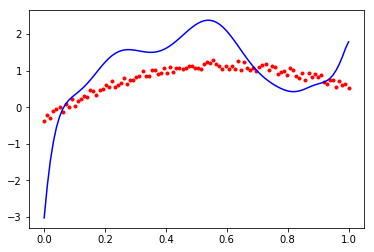

In [23]:
regularisation(X,y,0)

# Optimal Lambda based on CV

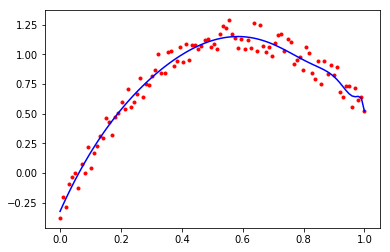

In [24]:
regularisation(X,y,optimal_lambda_CV)

# Underfit

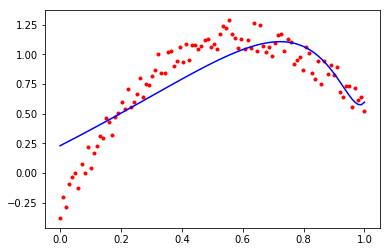

In [25]:
regularisation(X,y,1)

# Task 6 (CE6002)
* Use scikit-learn’s RidgeCV and LassoCV to obtain optimum l using the same transformed data (i.e. features up to 50th order).
* Observe the resulting Eout, and l compare these to previous results. What do you see? Is this what you expected?
* Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?

* Regularisation reduces overfitting by adding complexity penality to the loss function.
* Regularization penalizes hypothesis complexity

# Ridge CV

* L2 regularization leads to small weights
* L2 regularization: complexity = sum of squares of weights

Score : 0.9646524395223808
Regularisation alpha : 5.6984370594691364e-05
RidgeCV : 0.31959227427203163


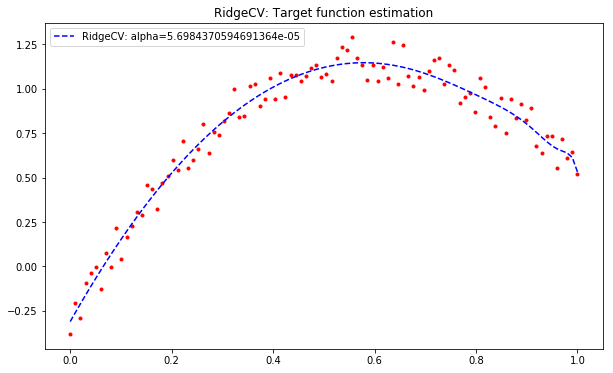

In [26]:
classifier_RidgeCV = RidgeCV(alphas=LAMBDAS_ALPHAS, cv=K_FOLDS)
classifier_RidgeCV.fit(X_trans, y)

ridgeCV_score  = classifier_RidgeCV.score(X_trans, y) 
predictions    = classifier_RidgeCV.predict(X_trans)

print("Score :", ridgeCV_score)
print("Regularisation alpha :", classifier_RidgeCV.alpha_)

ridgeCV_eout  = calc_error(classifier_RidgeCV.coef_, X_test, y_test)
print("RidgeCV :", ridgeCV_eout)

# Plotting the curves
plt.figure(figsize=(10,6))
plt.title('RidgeCV: Target function estimation')
plt.plot(X, y, 'r.')
plt.plot(X, predictions,'b--', label='RidgeCV: alpha=' + str(classifier_RidgeCV.alpha_))
plt.legend(loc='best')
plt.show()

# Lasso CV

* L1 regularization leads to many zero weights (sparsity)

Score : 0.963693300156486
Regularisation alpha lasso: 9.461848194721992e-05
Eout on LassoCV : 0.286626494219621


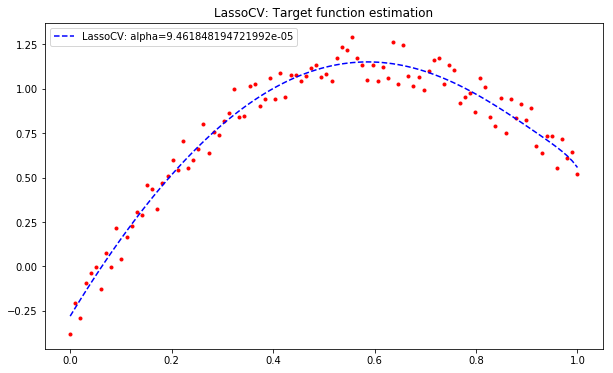

In [27]:
classifier_lassoCV = LassoCV(alphas=LAMBDAS_ALPHAS, cv=K_FOLDS, random_state=5, n_jobs=-2)
classifier_lassoCV.fit(X_trans, y)

lassoCV_score = classifier_lassoCV.score(X_trans, y) 
predictions = classifier_lassoCV.predict(X_trans)

print("Score :", lassoCV_score)
print("Regularisation alpha lasso:", classifier_lassoCV.alpha_)

lassoCV_eout = calc_error(classifier_lassoCV.coef_, X_test, y_test)
print("Eout on LassoCV :", lassoCV_eout)

# Plotting the curves
plt.figure(figsize=(10,6))
plt.title('LassoCV: Target function estimation')
plt.plot(X, y, 'r.')
plt.plot(X, predictions, 'b--', label='LassoCV: alpha=' + str(classifier_lassoCV.alpha_))
plt.legend(loc='best')
plt.show()

In [28]:
print('Eout for Lasso CV            :', lassoCV_eout)
print('Eout for Ridge CV            :', ridgeCV_eout)
print('KFold Cross Validation Eout :', min_eout)

Eout for Lasso CV            : 0.286626494219621
Eout for Ridge CV            : 0.31959227427203163
KFold Cross Validation Eout : 0.0815530038643911


In [29]:
def count_non_zero_elements(n):
    cnt = 0 
    for i in range(len(n)):

    # Approximate anything greater than 10e-4 as non-zero

     if(abs(n[i])>0.0001):
        cnt+=1

    return cnt

In [31]:
print("\n -------- Weights ----------\n")
print("\n -------- Ridge CV ----------\n")
print(classifier_RidgeCV.coef_)
print(count_non_zero_elements(classifier_RidgeCV.coef_))
print("\n -------- Lasso CV ----------\n")
print(classifier_lassoCV.coef_)
print(count_non_zero_elements(classifier_lassoCV.coef_))


 -------- Weights ----------


 -------- Ridge CV ----------

[ 0.          5.04452393 -4.25863462 -0.49930569  0.46361895  0.32833294
 -0.03294971 -0.29298079 -0.37275565 -0.29340485 -0.11091962  0.11321726
  0.32595168  0.48877427  0.57922795  0.58960505  0.52410266  0.39537274
  0.2211146   0.02110318 -0.18515767 -0.38011429 -0.54922412 -0.68149685
 -0.76963119 -0.80986048 -0.80160644 -0.74702257 -0.65048937 -0.5181067
 -0.3572137  -0.17595516  0.01709575  0.21325478  0.40398488  0.58109916
  0.73691394  0.86435805  0.9570449   1.00931336  1.01624341  0.97365154
  0.87807073  0.72671862  0.51745751  0.24874867 -0.08039666 -0.4704678
 -0.92150532 -1.43315082 -2.00469486]
50

 -------- Lasso CV ----------

[ 0.          4.69712909 -3.481188   -0.65282725 -0.          0.
  0.          0.02953263  0.22769708  0.06508488  0.          0.
  0.          0.          0.          0.          0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.      

* The key difference between Ridge CV and Lasso CV is the penalty term.
* In Ridge CV adds square magnitude of coefficent to the loss function
* In Lasso CV adds absolute value of magnitude of coefficent to the loss function.
* Lasso CV shrinks the less important feature coefficient to zero thus removing some feature altogethor
* This can be seen above.